In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from mlxtend.plotting import plot_decision_regions

In [128]:
#Reading dataset
training_df = pd.read_csv('OneDrive/Documents/GitHub/ECEN689-Fall2018/Challenges/5Files/5challenge_training_vaishno-gre1966.csv')
training_df=training_df.drop(training_df.columns[0],axis=1)
test_df=pd.read_csv('OneDrive/Documents/GitHub/ECEN689-Fall2018/Challenges/5Files/5challenge_testing_vaishno-gre1966.csv')
test_df=test_df.drop(test_df.columns[0],axis=1)

In [129]:
#finding x and y
training_df.head()
x=training_df.drop('Class',axis=1)
y=training_df['Class']
x_test=test_df.drop('Class',axis=1)
y_test=test_df['Class']

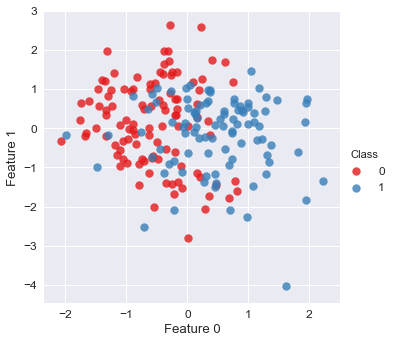

In [130]:
#plotting graph for separating classes according to features
sns.lmplot('Feature 0','Feature 1',data= training_df, hue='Class',palette='Set1',fit_reg=False,scatter_kws={"s":70})

In [46]:
#To find optimal cost function, gamma value and CV score of linear kernel
from sklearn.model_selection import GridSearchCV

# Create my estimator and prepare the parameter grid dictionary
params_dict = {"C": np.logspace(-1, 3, 100), "gamma": np.linspace(0.0001, 10, 100)}
svm = SVC(kernel="linear")

# Fit the grid search
search = GridSearchCV(estimator=svm, param_grid=params_dict)
search.fit(x, y)

print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 0.36783797718286343, 'gamma': 0.0001}
CV Score with best parameter values: 0.785


In [47]:
#To find optimal cost function, gamma value and CV score of rbf kernel
from sklearn.model_selection import GridSearchCV

# Create my estimator and prepare the parameter grid dictionary
params_dict = {"C": np.logspace(-1, 3, 100), "gamma": np.linspace(0.0001, 10, 100)}
svm = SVC(kernel="rbf")

# Fit the grid search
search = GridSearchCV(estimator=svm, param_grid=params_dict)
search.fit(x, y)

print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 0.14508287784959398, 'gamma': 0.3031272727272727}
CV Score with best parameter values: 0.81


In [48]:
#To find optimal cost function, gamma value and CV score of sigmoid kernel
from sklearn.model_selection import GridSearchCV

# Create my estimator and prepare the parameter grid dictionary
params_dict = {"C": np.logspace(-1, 3, 100), "gamma": np.linspace(0.0001, 10, 100)}
svm = SVC(kernel="sigmoid")

# Fit the grid search
search = GridSearchCV(estimator=svm, param_grid=params_dict)
search.fit(x, y)

print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 0.1592282793341092, 'gamma': 2.323309090909091}
CV Score with best parameter values: 0.795


In [131]:
#Used rbk kernel because of high CV score compared to other kernel 
clf1=svm.SVC(kernel='rbf',C=0.1450828,gamma=0.303127)
clf1.fit(x,y)
from sklearn.metrics import classification_report, confusion_matrix
y_pred=clf1.predict(x_test)
y_pred
#test_df['Class']=y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [132]:
test_df['Class']=y_pred

In [133]:
test_df.head()

,Class,Feature 0,Feature 1
0,0,-1.435221,-1.013433
1,0,-0.599484,-1.312220
2,1,1.217391,0.409971
3,1,-0.014388,-0.456248
4,1,0.707963,0.894069


In [113]:
test_df.to_csv('5challenge.csv')

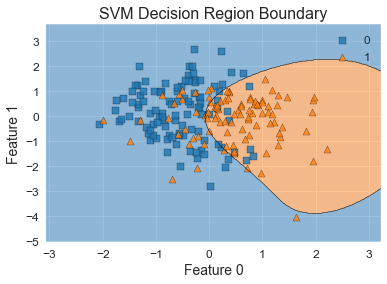

In [134]:
#plotting the SVM decision region boundry
x1 = training_df[['Feature 0', 'Feature 1']].values
y1 = training_df['Class'].values
plot_decision_regions(X=x1, 
                      y=y1,
                      clf=clf1, 
                      legend=1)
plt.xlabel('Feature 0', size=14)
plt.ylabel('Feature 1', size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

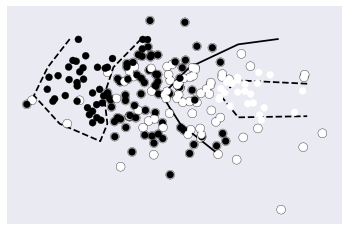

In [135]:
#plotting marginal boundry as well 
plt.figure(figsize=(6, 4))
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
ax.scatter(x.values[:, 0], x.values[:, 1], c=y, cmap=plt.cm.bone, zorder=2)

ax.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1],
           s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = [-2, 2]
x_min, x_max = [-2, 2]
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf1.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0,0,1.0], colors='k',
            linestyles=['dashed', 'solid', 'dashed'], zorder=1)

plt.show()